In [1]:
import numpy as np
c = np.array([[1, 0, 0, 0, 0, 0, 0]])  # 输入
W = np.random.randn(7, 3)              # 权重
h = np.dot(c, W)                       # 中间节点
print(h)

[[ 1.89905184 -0.65841666  0.16521573]]


In [3]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul
c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7, 3)
layer = MatMul(W)
h = layer.forward(c)
print(h)

[[-0.60698388  0.03438666 -0.36769089]]


In [5]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul
# 样本的上下文数据
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])
# 权重的初始值
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)
# 生成层
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)
# 正向传播
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[[ 0.92982973  0.13750992  1.50014265 -0.20995019 -0.23472069  0.47691376
  -0.87158923]]


In [9]:
h0,h1,h

(array([[0.52925993, 1.00680987, 1.68266801]]),
 array([[-0.35125069, -1.17559949,  1.09272948]]),
 array([[ 0.08900462, -0.08439481,  1.38769875]]))

In [12]:
import sys
sys.path.append('..')
from common.util import preprocess
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [14]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)
    return np.array(contexts), np.array(target)

In [16]:
contexts, target = create_contexts_target(corpus, window_size=1)
print(contexts)
print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


In [18]:
import sys
sys.path.append('..')
from common.util import preprocess, create_contexts_target,convert_one_hot
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, window_size=1)
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [47]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul,SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self,vocab_size,hidden_size):
        V,H = vocab_size,hidden_size
        W_in =0.01*np.random.randn(V,H).astype('f')
        W_out = 0.01*np.random.randn(H,V).astype('f')

        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        layers = [self.in_layer0,self.in_layer,self.out_layer]
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        self.word_vecs = W_in

    def forward(self,contexts,target):
        h0 = self.in_layer0.forward(contexts[:,0])
        h1 = self.in_layer0.forward(contexts[:,1])
        h = (h0+h1)*0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score,target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

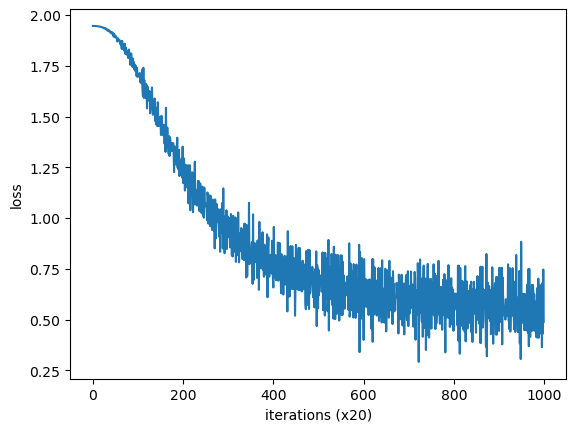

In [55]:
import sys
sys.path.append('..')
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target,convert_one_hot
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [57]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-1.0525235  1.1004047 -1.082985  -1.25351    1.185407 ]
say [ 1.1467179  -1.1749716   1.1789157   0.04856212 -0.09989616]
goodbye [-0.72288007  0.6497085  -0.71775854 -0.7101994   0.73823446]
and [ 0.9614192 -0.9653471  1.0080909 -1.7740415 -1.537017 ]
i [-0.7427685   0.6524414  -0.6873509  -0.7232586   0.73116827]
hello [-1.0350913  1.1309226 -1.0803715 -1.2485595  1.1769999]
. [ 1.0558989 -1.006214   1.0409559  1.3742962  1.443061 ]
